In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston, load_iris, make_moons, load_digits, load_wine, load_diabetes

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, plot_importance, plot_tree

from lightgbm import LGBMClassifier, LGBMRegressor, plot_importance, plot_tree, plot_metric

from sklearn.svm import SVR, SVC

import statsmodels.api as sm

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"
from sklearn.tree import export_graphviz
import graphviz

# 1. 특징

- 회귀, 분류 이상치 탐지 등에 사용되는 지도 학습 방법
- 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
- 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
- 각 서포트 벡터의 거리와 마진이 가장 큰 방향으로 학습
- 관련 클래스
    + 회귀, 분류 : SVR, SVC
    + 선형, 비선형 : LinearSVC, LinearSVR, KernelSVC, KernelSVR

(100, 2)

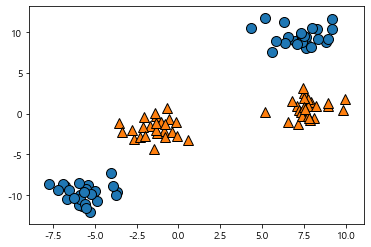

In [21]:
X,y = mglearn.datasets.make_blobs(centers=4, random_state=8)
y = y%2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
X.shape

In [22]:
linear_svm = LinearSVC().fit(X,y)

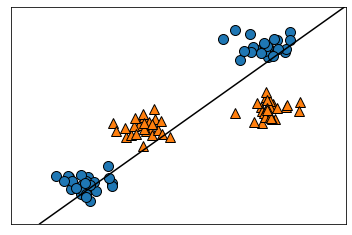

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

In [24]:
X_new = np.hstack([X, X[:, 1:]**2])
X_new

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00],
       [ 8.26341570e+00,  1.03472344e+01,  1.07065259e+02],
       [ 6.96767867e+00,  8.96225230e+00,  8.03219662e+01],
       [-8.47792492e-01, -2.12185612e+00,  4.50227339e+00],
       [ 7.48006237e+00,  2.49392925e+00,  6.21968311e+00],
       [ 7.71454967e+00,  1.84207010e+00,  3.39322225e+00],
       [-7.74064658e+00, -8.61800744e+00,  7.42700522e+01],
       [-5.41087235e+00, -8.71941280e+00

Text(0.5, 0, '특성 1**2')

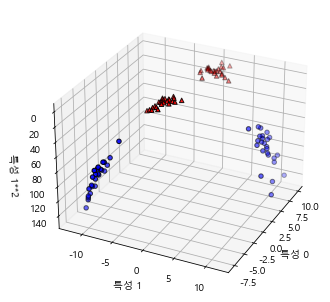

In [29]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
mask

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", cmap=mglearn.cm2,
          edgecolor="k", marker="^")
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

Text(0.5, 0, '특성 1**2')

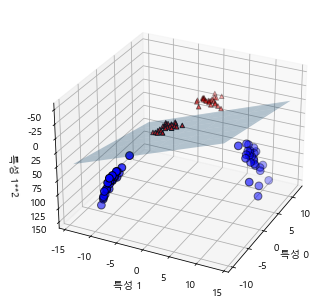

In [35]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:, 1].max()+2, 50)

XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", cmap=mglearn.cm2,
          edgecolor="k", marker="^")
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

Text(0, 0.5, '특성 1')

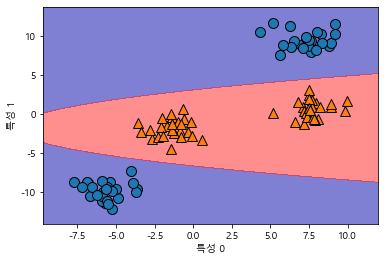

In [37]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 2. 하이퍼 파라미터

- cost
    + decision boundary와 마진의 간격을 어느 정도로 할지 결정
    + cost가 작으면 마진은 넓어진다

- gamma
    + 훈련 데이터 하나당 영향을 끼치는 범위를 조절하는 변수
    + gamma가 작을수록 영향을 끼치는 범위가 넓어진다

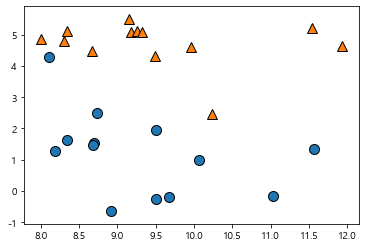

In [38]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:,0], X[:, 1], y)

In [39]:
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X,y)

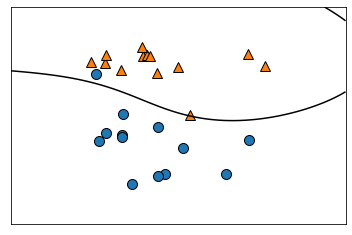

In [40]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [43]:
sv = svm.support_vectors_

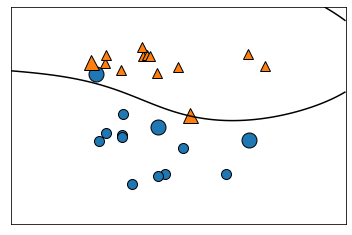

In [46]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15)

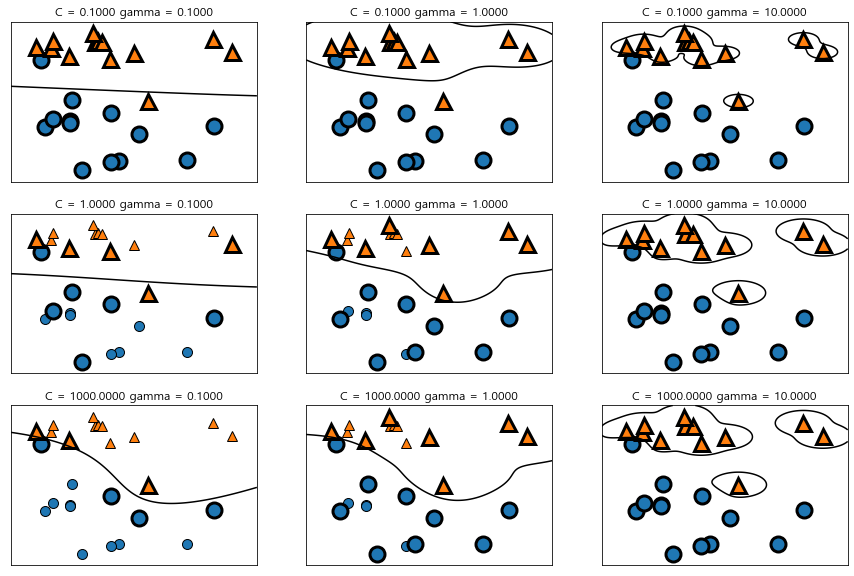

In [2]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

# 3. SVM 클래스의 종류

## (1) 희귀 모델과 분류 모델

### 1) 회귀 모델(SVR)

In [5]:
X, y = load_boston(return_X_y=True) # data와 target을 따로 받아와라 
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("학습 결과:", model.score(X_train, y_train))
print("테스트 결과:", model.score(X_test, y_test))

학습 결과: 0.21772837063748762
테스트 결과: 0.13544178468518187


### 2) 분류 모델(SVC)

In [6]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("학습 결과:", model.score(X_train, y_train))
print("테스트 결과:", model.score(X_test, y_test))

학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


## (2) 커널 기법

+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn 에서는 Linear, Polynomial, RBF(Radial Basis Function) 등 다양한 커널 기법을 지원

In [9]:
##### 회귀 모델에서 확인

X,y = load_boston(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=123)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("학습 결과:", linear_svr.score(X_train, y_train))
print("테스트 결과:", linear_svr.score(X_test, y_test))

print("--------------------------------------------------------------")

polynomial_svr = SVR(kernel="poly")
polynomial_svr.fit(X_train, y_train)

print("학습 결과:", polynomial_svr.score(X_train, y_train))
print("테스트 결과:", polynomial_svr.score(X_test, y_test))

print("--------------------------------------------------------------")

rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("학습 결과:", rbf_svr.score(X_train, y_train))
print("테스트 결과:", rbf_svr.score(X_test, y_test))

학습 결과: 0.7155066205123104
테스트 결과: 0.6380398541381507
--------------------------------------------------------------
학습 결과: 0.2024454261446289
테스트 결과: 0.133668450367462
--------------------------------------------------------------
학습 결과: 0.21772837063748762
테스트 결과: 0.13544178468518187


In [11]:
##### 분류 모델

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=123)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("학습 결과:", linear_svc.score(X_train, y_train))
print("테스트 결과:", linear_svc.score(X_test, y_test))

print("--------------------------------------------------------------")

polynomial_svc = SVC(kernel="poly")
polynomial_svc.fit(X_train, y_train)

print("학습 결과:", polynomial_svc.score(X_train, y_train))
print("테스트 결과:", polynomial_svc.score(X_test, y_test))

print("--------------------------------------------------------------")

rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("학습 결과:", rbf_svc.score(X_train, y_train))
print("테스트 결과:", rbf_svc.score(X_test, y_test))

학습 결과: 0.960093896713615
테스트 결과: 0.986013986013986
--------------------------------------------------------------
학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231
--------------------------------------------------------------
학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


## (3) 매개변수 튜닝

- SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
- 매개변수를 변경하면서 성능변화를 관찰

In [12]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=123)


In [13]:
##### polynomial 기법 사용

polynomial_svc = SVC(kernel="poly", C=0.1, gamma="auto")
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, C={}, gamma={}".format(0.1,"auto"))
print("polynomial 학습결과 :", polynomial_svc.score(X_train, y_train))
print("polynomial 테스트 결과:", polynomial_svc.score(X_test, y_test))

kernel=poly, C=0.1, gamma=auto
polynomial 학습결과 : 0.971830985915493
polynomial 테스트 결과: 0.986013986013986


In [14]:
##### rbf 기법 사용

rbf_svc = SVC(kernel="rbf", C=0.1, gamma="scale")
rbf_svc.fit(X_train, y_train)

print("kernel=rbf, C={}, gamma={}".format(10,"scale"))
print("polynomial 학습결과 :", rbf_svc.score(X_train, y_train))
print("polynomial 테스트 결과:", rbf_svc.score(X_test, y_test))

kernel=rbf, C=10, gamma=scale
polynomial 학습결과 : 0.8849765258215962
polynomial 테스트 결과: 0.8671328671328671


## (4) 데이터 전처리


+ SVM은 입력 데이터가 정규화되어야 좋은 성능을 보인다.
+ 주로 모든 특성 값을 0, 1 범위로 맞추는 방법을 사용한다.
+ sklearn의 StandardScaler 또는 MinMaxScaler사용

In [15]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, random_state=123)

In [16]:
model = SVC()
model.fit(X_train, y_train)

print("학습 결과:", model.score(X_train, y_train))
print("테스트 결과:", model.score(X_test, y_test))

학습 결과: 0.9014084507042254
테스트 결과: 0.9230769230769231


In [17]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [18]:
model = SVC()
model.fit(X_train_std, y_train)

print("학습 결과:", model.score(X_train_std, y_train))
print("테스트 결과:", model.score(X_test_std, y_test))

학습 결과: 0.9835680751173709
테스트 결과: 0.986013986013986


In [19]:
scaler = MinMaxScaler()
X_train_mms = scaler.fit_transform(X_train)
X_test_mms = scaler.transform(X_test)

In [20]:
model = SVC()
model.fit(X_train_mms, y_train)

print("학습 결과:", model.score(X_train_mms, y_train))
print("테스트 결과:", model.score(X_test_mms, y_test))

학습 결과: 0.9812206572769953
테스트 결과: 0.986013986013986


## (5) LinearSVR

### 1) Boston Housing Sample

In [73]:
X,y = load_boston(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2)

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

SVR(kernel='linear')

In [76]:
print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.6935177031373634
테스트 결과:  0.8138325048061992


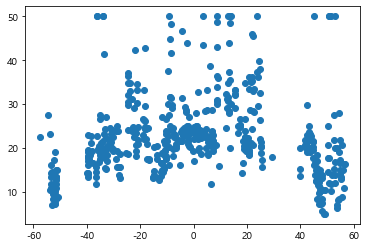

In [77]:
from sklearn.manifold import TSNE
##### 차원 축소 (특성(변수) 줄이기)

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

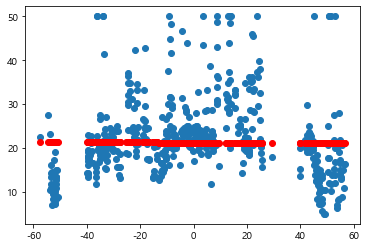

In [78]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [79]:
from sklearn.pipeline import make_pipeline
import multiprocessing

estimator = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   14.7s finished


{'fit_time': array([0.04487777, 0.03989196, 0.0922699 , 0.03989172, 0.05787468]),
 'score_time': array([0.0039897 , 0.00698137, 0.0039897 , 0.00797987, 0.00298977]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [80]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler",StandardScaler()), ("model",SVR(kernel="linear"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
    "model__epsilon": [1.0, 0.1, 0.01]
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [81]:
dir(gs)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [82]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
0.49854468515516936


In [83]:
model = SVR(kernel="linear", C=0.1, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습결과 : ", model.score(X_train, y_train))
print("테스트결과 : ", model.score(X_test, y_test))

학습결과 :  0.6737790398133938
테스트결과 :  0.8174258947350319


### 2) Diabetes Sample

In [48]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state=123)

In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
model = SVR(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과:" , model.score(X_train, y_train))
print("테스트 결과: ",model.score(X_test, y_test))

학습 결과: 0.4924588716811171
테스트 결과:  0.5570136940699909


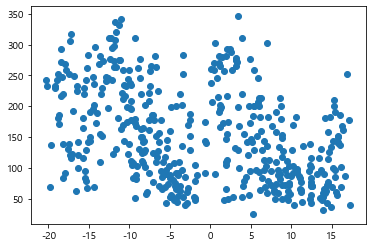

In [51]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

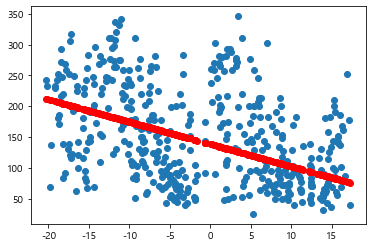

In [52]:
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [53]:
pipe = Pipeline([("scaler",StandardScaler()), ("model",SVR(kernel="linear"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
    "model__epsilon": [1.0, 0.1, 0.01]
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=4,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [54]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])
0.478076999215815


In [56]:
model = SVR(kernel="linear", C=1.0, gamma="scale", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.49306502223681103
테스트 결과:  0.5563982990905709


## (6) KernelSVR

### 1) Boston Housing Sample

In [57]:
X,y = load_boston(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.6804558691341752
테스트 결과:  0.5895829313193317


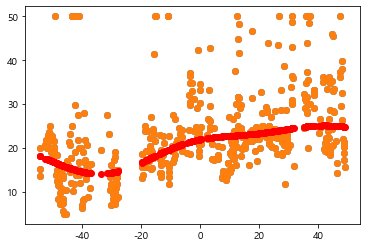

In [58]:
##### 차원 축소 (특성(변수) 줄이기)

X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [60]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cv = cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)


print("cross_validate 평균 :", cv["test_score"].mean())

cross_validate 평균 : 0.17631266230186618


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


In [63]:
pipe = Pipeline([("scaler",StandardScaler()), ("model",SVR(kernel="rbf"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
    "model__epsilon": [1.0, 0.1, 0.01]
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

dir(gs)

print(gs.best_params_)
print(gs.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(epsilon=0.01))])


In [64]:
model = SVR(kernel="rbf", C=1.0, gamma="scale", epsilon=0.01)
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.6807135712191222
테스트 결과:  0.5902108703816756


### 2) Diabetes Sample

In [65]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.15345164466149952
테스트 결과:  0.18096718824416858


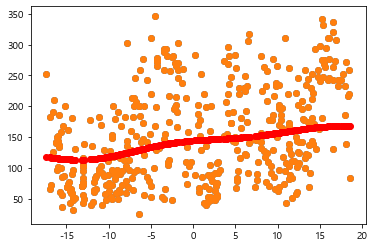

In [66]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color="r")

In [67]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.1s finished


{'fit_time': array([0.02193952, 0.02094245, 0.01994491, 0.02891779, 0.02256036]),
 'score_time': array([0.01097107, 0.01097345, 0.00997519, 0.01296663, 0.00897884]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [69]:
pipe = Pipeline([("scaler",StandardScaler()), ("model",SVR(kernel="rbf"))])
params = [{"model__kernel":["rbf","polynomial","sigmoid"]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)
print(gs.best_params_)
print(gs.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'model__kernel': 'sigmoid'}
Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])


In [70]:
pipe = Pipeline([("scaler",StandardScaler()), ("model",SVR(kernel="sigmoid"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
    "model__epsilon": [1.0, 0.1, 0.01]
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)

dir(gs)

print(gs.best_params_)
print(gs.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}
Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])


In [71]:
model = SVR(kernel="sigmoid", C=1.0, gamma="auto", epsilon=1.0)
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.3726520070304975
테스트 결과:  0.3905617056363221


## (7) LinearSVC

### 1) Breast Cancer Sample

In [85]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))


estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)



pipe = Pipeline([("scaler",StandardScaler()), ("model",SVC(kernel="linear"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)



print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="linear", C=0.1, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.9868131868131869
테스트 결과:  0.9912280701754386
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'model__C': 0.1, 'model__gamma': 'scale'}
0.9736531594472908
학습 결과:  0.9824175824175824
테스트 결과:  0.9912280701754386


### 2) 붓꽃 데이터

In [91]:
X,y = load_iris(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))


estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)



pipe = Pipeline([("scaler",StandardScaler()), ("model",SVC(kernel="linear"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)



print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="linear", C=1.0, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.9833333333333333
테스트 결과:  0.9333333333333333
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'model__C': 1.0, 'model__gamma': 'scale'}
0.9666666666666668
학습 결과:  0.9833333333333333
테스트 결과:  0.9333333333333333


### 3) Wine Sample

In [93]:
X,y = load_wine(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))


estimator = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)



pipe = Pipeline([("scaler",StandardScaler()), ("model",SVC(kernel="linear"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)



print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="linear", C=0.1, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  1.0
테스트 결과:  0.9444444444444444
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'model__C': 0.1, 'model__gamma': 'scale'}
0.972063492063492
학습 결과:  1.0
테스트 결과:  0.9722222222222222


## (8) KernelSVC

### 1) Breast Cancer sample

In [95]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))


estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)



pipe = Pipeline([("scaler",StandardScaler()), ("model",SVC(kernel="rbf"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)



print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="rbf", C=1.0, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.9868131868131869
테스트 결과:  0.9824561403508771
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


{'model__C': 1.0, 'model__gamma': 'scale'}
0.9736376339077782
학습 결과:  0.9868131868131869
테스트 결과:  0.9824561403508771


### 2) Iris Sample

In [97]:
X,y = load_iris(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))


estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)



pipe = Pipeline([("scaler",StandardScaler()), ("model",SVC(kernel="rbf"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)



print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="rbf", C=1.0, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  0.9833333333333333
테스트 결과:  0.9333333333333333
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9666666666666666


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


학습 결과:  0.9833333333333333
테스트 결과:  0.9333333333333333


### 3) Wine Sample

In [99]:
X,y = load_wine(return_X_y=True)
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))


estimator = make_pipeline(StandardScaler(), SVC(kernel="rbf"))
cross_validate(
    estimator=estimator,
    X = X,
    y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)



pipe = Pipeline([("scaler",StandardScaler()), ("model",SVC(kernel="rbf"))])
params = [
    {
    "model__gamma" : ["scale", "auto"],
    "model__C" : [1.0, 0.1, 0.01],
}
]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = params,
    n_jobs = multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X, y)



print(gs.best_params_)
print(gs.best_score_)


model = SVC(kernel="rbf", C=1.0, gamma="scale")
model.fit(X_train, y_train)

print("학습 결과: ", model.score(X_train, y_train))
print("테스트 결과: ", model.score(X_test, y_test))

학습 결과:  1.0
테스트 결과:  0.9722222222222222
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9833333333333334


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished


학습 결과:  1.0
테스트 결과:  0.9722222222222222


## (8) 예제

### 1) 농구선수의 포지션 예측

In [100]:
df = pd.read_csv('data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [101]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

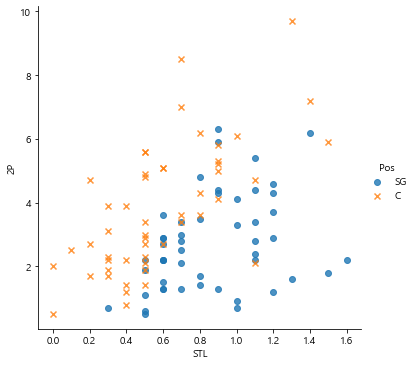

In [103]:
sns.lmplot("STL","2P", data=df, fit_reg=False, hue="Pos", markers=["o","x"])

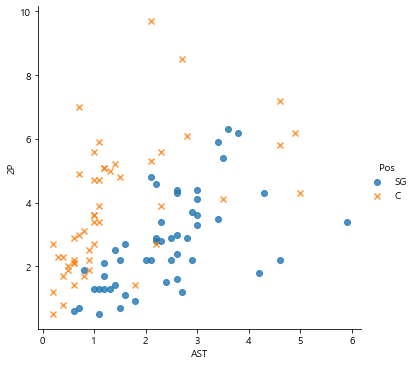

In [104]:
sns.lmplot("AST","2P", data=df, fit_reg=False, hue="Pos", markers=["o","x"])

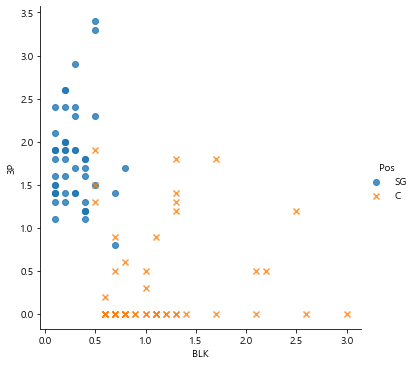

In [105]:
sns.lmplot("BLK","3P", data=df, fit_reg=False, hue="Pos", markers=["o","x"])

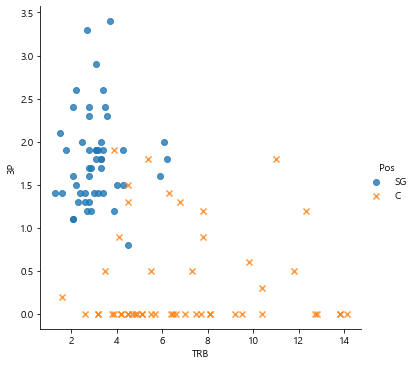

In [106]:
sns.lmplot("TRB","3P", data=df, fit_reg=False, hue="Pos", markers=["o","x"])

In [107]:
df.drop(["2P","AST","STL"], axis=1, inplace=True)

In [108]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [109]:
train, test = train_test_split(df, test_size=.2)
print(train.shape, test.shape)

(80, 5) (20, 5)


In [110]:
X_train = train[['3P','TRB','BLK']]
y_train = train['Pos']

In [111]:
params = [{
    "kernel" : ["rbf","poly","sigmoid"],
    "gamma" : ["scale", "auto"],
    "C" : [0.01, 0.1, 1, 10, 100, 1000]
}]

svm = GridSearchCV(SVC(),params).fit(X_train,y_train)

In [112]:
X_test = test[['3P','TRB','BLK']]
y_test = test['Pos']

In [113]:
preds = svm.predict(X_test)

In [114]:
print('정확도 : ', accuracy_score(y_test, preds))

정확도 :  0.9


### 2) 손글씨 이미지

# 4. 학습모델 저장

- serializable
    + pickle
    + joblib

In [119]:
import pickle

phone = {'tom':'111-1111', '길동':'222-2222'}
product = ['마우스','키보드']

obj = (phone, product)
obj[1][0]
obj[0]['tom']

f = open('data/obj1.pickle','wb')
pickle.dump(obj,f)

f.close()

In [120]:
f = open('data/obj1.pickle','rb')
obj2 = pickle.load(f)
obj2

({'tom': '111-1111', '길동': '222-2222'}, ['마우스', '키보드'])

In [121]:
##### 학습된 데이터 모델 저장

iris = load_iris()
X, y = iris.data, iris.target

clf = LogisticRegression(random_state=0, max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000, random_state=0)

In [122]:
f = open('data/iris_logistic.pickle','wb')
pickle.dump(clf, f)
f.close()

In [123]:
f = open('data/iris_logistic.pickle','rb')
clf2 = pickle.load(f)

print(clf2.predict(X))
f.close()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- joblib

In [124]:
import joblib

In [126]:
joblib.dump(clf, 'data/iris_logistic.pkl')

['data/iris_logistic.pkl']

In [127]:
clf3 = joblib.load('data/iris_logistic.pkl')

In [128]:
print(clf3.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
